In [1]:
import pandas as pd
import numpy as np

# Dimensions
## X:(m,n)
## Y:(m,1)
## w:(n,1)

In [2]:
class LinearReg:
    iterations=100000
    learning_rate=0.007
    
    def init_weights(self, x):
        return np.zeros(x.shape[1]).reshape(-1,1)
    def hypothesis(self,x,w):
        y_hat=x @ w
        return y_hat
    def cost_fn(self,y,y_hat):
        m=y.shape[0]
        cost=(1/(2*m))*float(sum(np.square(y_hat-y)))
        return cost
    def gradient_descent(self,x,y,w,y_hat,alpha):
        m=y.shape[0]
        w-=(alpha/m)*(np.transpose(x) @ (y_hat-y))
        return w
    def fit_model(self,x,y,verbose):
        weights=self.init_weights(x)
        costs=[]
        for itertaion in range(self.iterations):
            weights=self.gradient_descent(x,y,weights,self.hypothesis(x,weights), self.learning_rate)
            J=self.cost_fn(y, self.hypothesis(x,weights))
            costs.append(J)
            if itertaion==int(self.iterations/4) and verbose:
                print(f"Cost after {itertaion}/{self.iterations} iterations is : {J}")
            if itertaion==int(self.iterations/2) and verbose:
                print(f"Cost after {itertaion}/{self.iterations} iterations is : {J}")
            if itertaion==int(3*self.iterations/4) and verbose:
                print(f"Cost after {itertaion}/{self.iterations} iterations is : {J}")
        print(f"Cost after {self.iterations}/{self.iterations} iterations is : {J}")
        return weights,J,costs
            

In [3]:
X2=np.random.rand(500,1)
Y2=(3*X2)+(np.random.rand(500,1)*0.1)
model1=LinearReg()
weights1,J1,costs1=model1.fit_model(X2,Y2, True)
J1

Cost after 25000/100000 iterations is : 0.0007268951176703186
Cost after 50000/100000 iterations is : 0.0007268951176703186
Cost after 75000/100000 iterations is : 0.0007268951176703186
Cost after 100000/100000 iterations is : 0.0007268951176703186


0.0007268951176703186

In [4]:
test_data=pd.read_csv('Dataset\Marketing_Data.csv')
test_data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [5]:
x=test_data.iloc[:,:-1]
y=test_data.iloc[:,-1]
x=x.to_numpy()
y=y.to_numpy().reshape(-1,1)

In [6]:
model2=LinearReg()
weights2,J2,costs2=model2.fit_model(x,y,True)
J2

C:\Users\nithi\AppData\Local\Temp/ipykernel_28828/3574939118.py:12: RuntimeWarning: overflow encountered in square
  cost=(1/(2*m))*float(sum(np.square(y_hat-y)))
C:\Users\nithi\AppData\Local\Temp/ipykernel_28828/3574939118.py:16: RuntimeWarning: overflow encountered in matmul
  w-=(alpha/m)*(np.transpose(x) @ (y_hat-y))
C:\Users\nithi\AppData\Local\Temp/ipykernel_28828/3574939118.py:8: RuntimeWarning: invalid value encountered in matmul
  y_hat=x @ w
C:\Users\nithi\AppData\Local\Temp/ipykernel_28828/3574939118.py:16: RuntimeWarning: invalid value encountered in matmul
  w-=(alpha/m)*(np.transpose(x) @ (y_hat-y))
C:\Users\nithi\AppData\Local\Temp/ipykernel_28828/3574939118.py:16: RuntimeWarning: invalid value encountered in subtract
  w-=(alpha/m)*(np.transpose(x) @ (y_hat-y))


Cost after 25000/100000 iterations is : nan
Cost after 50000/100000 iterations is : nan
Cost after 75000/100000 iterations is : nan
Cost after 100000/100000 iterations is : nan


nan

## Normailization

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [9]:
model3=LinearReg()
weights3,J3,costs3=model3.fit_model(x,y,True)
J3

Cost after 25000/100000 iterations is : 2.9094026388350724
Cost after 50000/100000 iterations is : 2.9094011984176302
Cost after 75000/100000 iterations is : 2.909401198413865
Cost after 100000/100000 iterations is : 2.9094011984138635


2.9094011984138635

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\nithi\AppData\Local\Temp/ipykernel_28828/4085804078.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


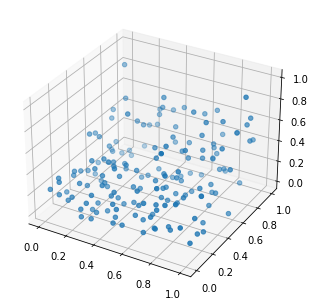

In [11]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x[:,0], x[:,1], x[:,2])


In [12]:
y_pred=LinearReg.hypothesis(1,x,weights3)

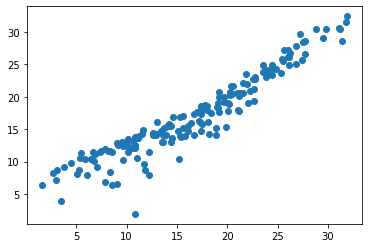

In [13]:
plt.scatter(y_pred,y)

## R<sup>2</sup> Score Calculation

In [14]:
def r2_score(y,y_pred):
    mean_y=np.mean(y)
    ss_tot=sum((y-mean_y)**2)
    ss_res=sum((y-y_pred)**2)
    r2=1-(ss_res/ss_tot)
    return r2
r2_score(y,y_pred)

array([0.85321284])